<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/Book/Chap10/MultyClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)


4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
print(x_train[0].max(), x_train[0].min() ) 

255 0


In [4]:
val, _, count = tf.unique_with_counts(y_train)

In [5]:
dict(zip(val.numpy(), count.numpy()))

{9: 6000,
 0: 6000,
 3: 6000,
 2: 6000,
 7: 6000,
 5: 6000,
 1: 6000,
 6: 6000,
 4: 6000,
 8: 6000}

In [6]:
import matplotlib.pyplot as plt


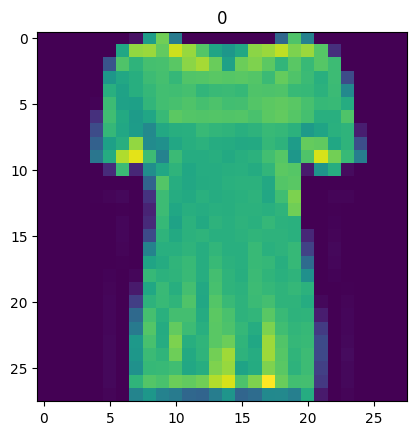

In [7]:
plt.imshow(x_train[10], label = y_train[10])
plt.title(y_train[10])
plt.show()

In [8]:
x_val = x_train[:5000]
x_train = x_train[5000:]

y_val = y_train[:5000]
y_train = y_train[5000:]

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(55000, 28, 28) (55000,) (5000, 28, 28) (5000,)


In [9]:
from keras.layers import Flatten, Dense
import numpy as np

In [10]:
def create_model (activation = 'relu', initializer = None):
  tf.random.set_seed(42)
  np.random.seed(42)
  model = keras.models.Sequential(
      (Flatten(input_shape = [28, 28]),
      Dense(100, activation = activation, kernel_initializer=initializer),
      Dense(300, activation = activation, kernel_initializer=initializer),
      Dense(300, activation = activation, kernel_initializer=initializer),
      Dense(100, activation = activation, kernel_initializer=initializer),
      Dense(10, activation = 'softmax')
      )
  )
  model.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
  return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 300)               30300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 230,210
Trainable params: 230,210
Non-trai

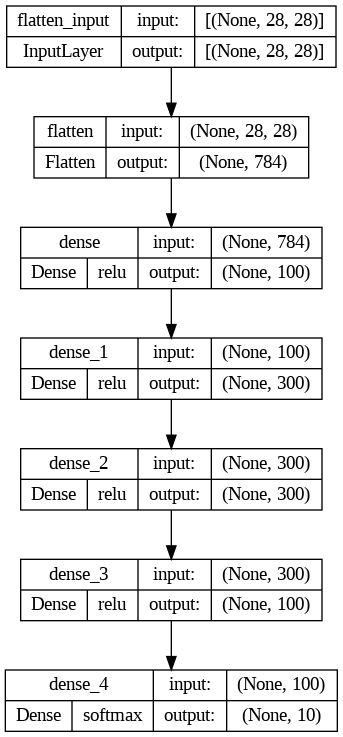

In [12]:
keras.utils.plot_model(model, show_shapes = True, show_layer_activations = True)

In [13]:
ES = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5, 
    restore_best_weights=True)

history = model.fit(
    x_train, y_train, 
    callbacks=[ES], 
    validation_data=(x_val, y_val), 
    epochs=200)

Epoch 1/200
1719/1719 [==============================] - 13s 4ms/step - loss: 0.8874 - accuracy: 0.7704 - val_loss: 0.4903 - val_accuracy: 0.8224
Epoch 2/200
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4595 - accuracy: 0.8372 - val_loss: 0.4651 - val_accuracy: 0.8444
Epoch 3/200
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4170 - accuracy: 0.8502 - val_loss: 0.4143 - val_accuracy: 0.8572
Epoch 4/200
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3988 - accuracy: 0.8591 - val_loss: 0.3555 - val_accuracy: 0.8770
Epoch 5/200
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3775 - accuracy: 0.8656 - val_loss: 0.3761 - val_accuracy: 0.8632
Epoch 6/200
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3638 - accuracy: 0.8710 - val_loss: 0.3997 - val_accuracy: 0.8644
Epoch 7/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3515 - accuracy: 0.8757 - val_loss: 0.3566 - val_a

In [14]:
import pandas as pd

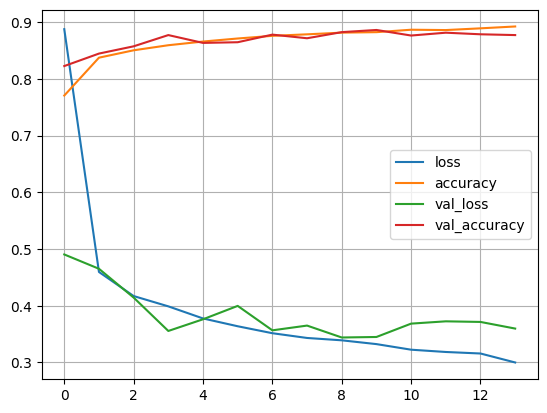

In [17]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3817 - accuracy: 0.8697


[0.381709486246109, 0.869700014591217]

## Apply normalization to data

In [18]:
x_train_norm = x_train/255.0
x_val_norm = x_val/255.0
x_test_norm = x_test/255.0


In [19]:
model2 = create_model()
history2 = model2.fit(
    x_train_norm, y_train, 
    callbacks=[ES], 
    validation_data=(x_val_norm, y_val), 
    epochs=200)

Epoch 1/200
1719/1719 [==============================] - 10s 4ms/step - loss: 0.5027 - accuracy: 0.8169 - val_loss: 0.3843 - val_accuracy: 0.8594
Epoch 2/200
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3779 - accuracy: 0.8619 - val_loss: 0.3839 - val_accuracy: 0.8644
Epoch 3/200
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3431 - accuracy: 0.8731 - val_loss: 0.3198 - val_accuracy: 0.8792
Epoch 4/200
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3174 - accuracy: 0.8830 - val_loss: 0.3047 - val_accuracy: 0.8896
Epoch 5/200
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3016 - accuracy: 0.8877 - val_loss: 0.3050 - val_accuracy: 0.8828
Epoch 6/200
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2860 - accuracy: 0.8947 - val_loss: 0.3319 - val_accuracy: 0.8838
Epoch 7/200
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2759 - accuracy: 0.8985 - val_loss: 0.3183 - val_a

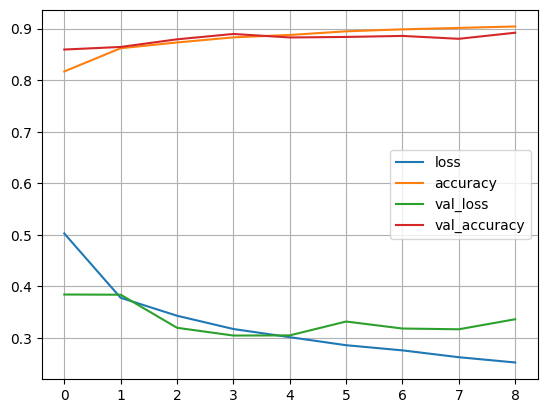

In [20]:
pd.DataFrame(history2.history).plot()
plt.grid(True)
plt.show()

In [22]:
model2.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3573 - accuracy: 0.8742


[0.3572874367237091, 0.8741999864578247]